<a href="https://colab.research.google.com/github/gurokeretcha/Fish-Weight-Prediction-Beginners-/blob/main/Fish_Weight_Prediction_(Regression_Analysis_for_beginners)%E2%80%8A_%E2%80%8APart%C2%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fish Weight Prediction (Regression Analysis for beginners) -   Part 1
Build an ML regression model using the top linear ML algorithms (Linear Regression, Lasso Regression, and Ridge Regression)

## Step 1: Collect the data

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
data = pd.read_csv("Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Step 2: Visualize The data

In [163]:
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [164]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

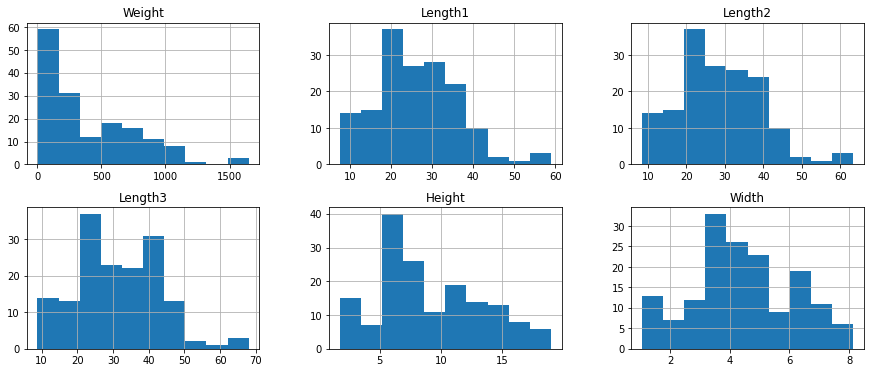

In [166]:
# what is the distribution of the features?
data_num = data.drop(columns=["Species"])

fig, axes = plt.subplots(len(data_num.columns)//3, 3, figsize=(15, 6))
i = 0
for triaxis in axes:
    for axis in triaxis:
        data_num.hist(column = data_num.columns[i], ax=axis)
        i = i+1

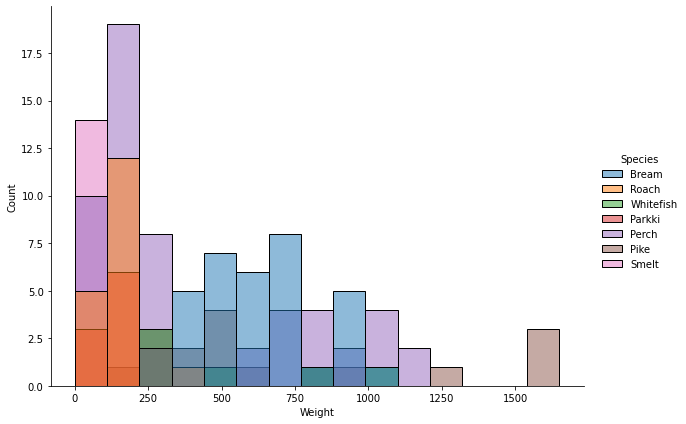

In [168]:
sns.displot(
  data=data,
  x="Weight",
  hue="Species",
  kind="hist",
  height=6,
  aspect=1.4,
  bins=15
)
plt.show()

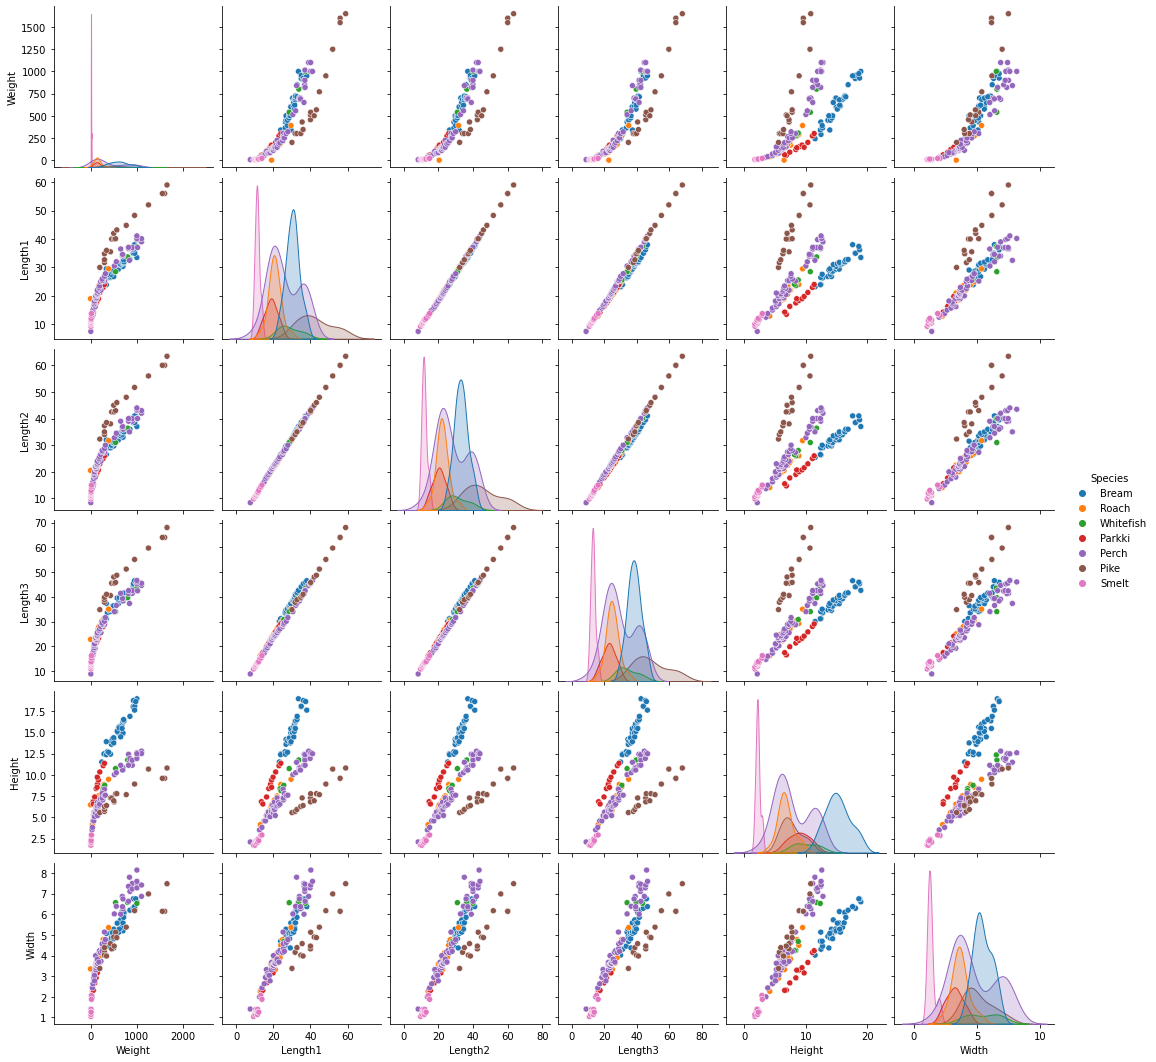

In [169]:
sns.pairplot(data, kind='scatter', hue='Species');

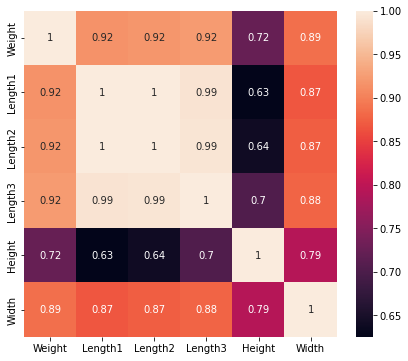

In [170]:
plt.figure(figsize=(7,6))
corr = data_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

In [171]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Step3: Clean the data

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ct = make_column_transformer(
    (StandardScaler(),['Length1','Length2','Length3','Height','Width']), #turn all values from 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["Species"])
)
#create X and y values
data_cleaned =   data.drop("Weight",axis=1)
y = data['Weight']

x_train, x_test, y_train, y_test = train_test_split(data_cleaned,y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127, 6), (32, 6), (127,), (32,))

In [174]:
x_train.head()

,Species,Length1,Length2,Length3,Height,Width
75,Perch,15.0,16.2,17.2,4.5924,2.6316
138,Pike,43.2,46.0,48.7,7.7920,4.8700
2,Bream,23.9,26.5,31.1,12.3778,4.6961
86,Perch,20.0,22.0,23.5,6.1100,3.4075
45,Roach,20.5,22.5,25.3,7.0334,3.8203


In [176]:
X_train_normal = pd.DataFrame(ct.fit_transform(x_train))
X_test_normal = pd.DataFrame(ct.transform(x_test))

In [177]:
X_train_normal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.130830,-1.148787,-1.220929,-1.062734,-1.104417,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.709250,1.659079,1.536085,-0.259441,0.270423,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.234492,-0.178283,-0.004342,0.891871,0.163613,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.627269,-0.602290,-0.669526,-0.681725,-0.627854,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.576913,-0.555178,-0.511983,-0.449896,-0.374310,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Step 4 Train the model

In [189]:
def models_score(model_name, train_data, y_train, val_data,y_val):
    model_list = ["Linear_Regression","Lasso_Regression","Ridge_Regression"]
    #model_1
    if model_name=="Linear_Regression":
        reg = LinearRegression()
    #model_2
    elif model_name=="Lasso_Regression":
      reg = Lasso(alpha=0.1,tol=0.03)
        
    #model_3
    elif model_name=="Ridge_Regression":
        reg = Ridge(alpha=1.0)
    else:
        print("please enter correct regressor name")
        
    if model_name in model_list:
        reg.fit(train_data,y_train)
        pred = reg.predict(val_data)
     
        score_MSE = mean_squared_error(pred, y_val)
        score_MAE = mean_absolute_error(pred, y_val)
        score_r2score = r2_score(pred, y_val)
        return round(score_MSE,2), round(score_MAE,2), round(score_r2score,2)

In [190]:
model_list = ["Linear_Regression","Lasso_Regression","Ridge_Regression"]
result_scores = []
for model in model_list:
    score = models_score(model,X_train_normal,y_train, X_test_normal,y_test)
    result_scores.append((model, score[0], score[1],score[2]))
    print(model,score)

Linear_Regression (7007.38, 65.3, 0.94)
Lasso_Regression (7720.81, 66.51, 0.93)
Ridge_Regression (7610.02, 69.12, 0.93)


## Step5: Evaluate

In [191]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score"])
df_result_scores

,model,mse,mae,r2score
0,Linear_Regression,7007.38,65.30,0.94
1,Lasso_Regression,7720.81,66.51,0.93
2,Ridge_Regression,7610.02,69.12,0.93


## Step6: Parameter Tuning


## Step7-8: choose best model and make prediction

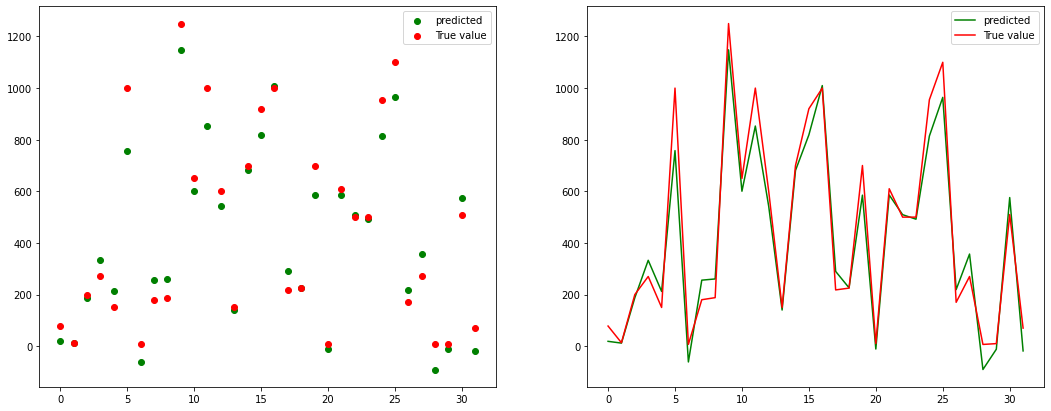

In [199]:
# winner
reg = LinearRegression()
reg.fit(X_train_normal,y_train)
pred = reg.predict(X_test_normal)
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.scatter(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.plot(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()
plt.show()